No handles with labels found to put in legend.


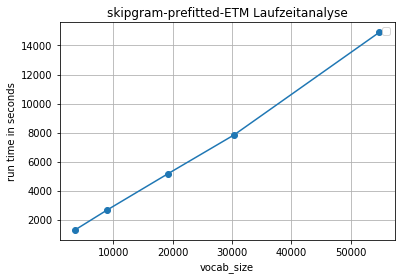

In [1]:
import os
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

figures_directory_pth = os.path.join(os.pardir, 'figures/')

def get_plot(for_model = None, with_out_stopwords=True, vocab_size = None, run_times = None):
    return True
def get_time(time):
    #time = "01:34:11"
    return  sum(x * int(t) for x, t in zip([3600, 60, 1], time.split(":"))) 

vocab_size_with_out_stopwords = [3524,8956,19148,30355,54801]
string_times = [
    "0:21:30",
    "0:44:30",
    "1:25:54",
    "2:10:44",
    "4:08:24",
]

skipgram_run_times = [get_time(t) for t in string_times]

xs = vocab_size_with_out_stopwords
ys = np.array(skipgram_run_times)
markers_on = vocab_size_with_out_stopwords
plt.plot(xs, ys, marker='o', label=None)
plt.legend()
plt.grid()
plt.title('skipgram-prefitted-ETM Laufzeitanalyse')
plt.xlabel('vocab_size')
plt.ylabel('run time in seconds')
plt.savefig(f'{figures_directory_pth}/skipgram_runtime.png')
plt.show()

# LDA und ETM

# Mean und Std

In [2]:
# LDA mean, std of 3 values
# Plot over vocab-size and results
import math
def get_mean_std(liste):
    mean = sum(liste)/len(liste)
    quadrad = sum([(x-mean)**2 for x in liste])
    prod = (1/len(liste))*quadrad
    std = math.sqrt(prod)
    return mean , std

In [3]:
vocab_size_with_out_stopwords = [3524,8956,19148,30355,54801] #min_df 100 to min_df 2
ldas_values = [
    # min_df=100
    [0.2078231833731884, 
     0.16573507290884648, 
     0.21046902581644802, 
     0.1891627910805947, 
     0.14362431441715948],#co
    [0.786, 
     0.766, 
     0.774 ,
     0.756, 
     0.554],#div
    [0.16334902213132607, 
     0.1269530658481764, 
     0.16290302598193077, 
     0.14300707005692959, 
     0.07956787018710636],#quality
    [0.5906189555125725,
     0.41075800376647836,
     0.2912726883332441,
     0.23339358639619734,
     0.1488972348024596]
    # min_df=2
]
for values_by_vocab_sizes in ldas_values:
    mn, std = get_mean_std(values_by_vocab_sizes)
    print(mn, std)

0.1833628775192474 0.025520900172597234
0.7272000000000001 0.08715595217769122
0.13515601084109383 0.0309312513603051
0.3349880937621904 0.1535906931610293


In [4]:
def get_reserved_list(liste):
    reserved_list = [None] * len(liste)
    #print(reserved_list)
    i = 0
    j = len(liste)-1
    while j >= 0:
        #print(liste[j])
        reserved_list[i] =  liste[j]
        j = j - 1
        i = i + 1
    return reserved_list

In [5]:
etms_values = [
    get_reserved_list([0.1912626359290752, 
     0.1894663393067938,
     0.21448258799152922,
     0.19353942927954834,
     0.17383255850088972]),
    
    get_reserved_list([0.822,
     0.864,
     0.868,
     0.868,
     0.898]),
    
    get_reserved_list([0.1572178867336998,
     0.16369891716106985,
     0.18617088637664736,
     0.16799222461464797,
     0.15610163753379896]),
    [
        1.0814958091553837,
        0.8449858757062146,
        0.6094554800021417,
        0.44572203253665393,
        0.3074745020067013,
    ]
]

for values_by_vocab_sizes in etms_values:
    mn, std = get_mean_std(values_by_vocab_sizes)
    print(mn, std)
"""
%PPL
%1.0814958091553837
%0.8449858757062146
%0.6094554800021417
%0.44572203253665393
"""

0.19251671020156727 0.012988616023630462
0.8639999999999999 0.024298148077579924
0.1662363104839728 0.010871545226661134
0.657826739881419 0.2773441539409445


'\n%PPL\n%1.0814958091553837\n%0.8449858757062146\n%0.6094554800021417\n%0.44572203253665393\n'

In [6]:
ldas_values[2]

[0.16334902213132607,
 0.1269530658481764,
 0.16290302598193077,
 0.14300707005692959,
 0.07956787018710636]

In [7]:
etms_values[2]

[0.15610163753379896,
 0.16799222461464797,
 0.18617088637664736,
 0.16369891716106985,
 0.1572178867336998]

In [8]:
lda_qlt = ldas_values[2]
etm_qlt = etms_values[2]

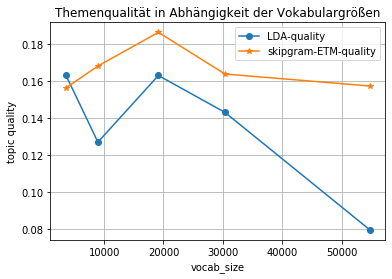

In [9]:


xs = vocab_size_with_out_stopwords

markers_on = vocab_size_with_out_stopwords
plt.plot(xs, lda_qlt, marker='o', label="LDA-quality")
plt.plot(xs, etm_qlt, marker='*', label="skipgram-ETM-quality")

plt.legend()
plt.grid()
plt.title('Themenqualität in Abhängigkeit der Vokabulargrößen')
plt.xlabel('vocab_size')
plt.ylabel('topic quality')
plt.savefig(f'{figures_directory_pth}/topic_quality.png')
plt.show()


In [10]:
etms_values
update_etms_values = []
for e in etms_values:
    update_etms_values.append(e[:-1])
update_etms_values

[[0.17383255850088972,
  0.19353942927954834,
  0.21448258799152922,
  0.1894663393067938],
 [0.898, 0.868, 0.868, 0.864],
 [0.15610163753379896,
  0.16799222461464797,
  0.18617088637664736,
  0.16369891716106985],
 [1.0814958091553837,
  0.8449858757062146,
  0.6094554800021417,
  0.44572203253665393]]

# BERT und ETM

[(2, 0.169, 0.914, 0.1541, 0.333), (5, 0.176, 0.874, 0.154, 0.461), (10, 0.182, 0.852, 0.155, 0.709), (30, 0.19, 0.846, 0.161, 0.79), (100, 0.195, 0.83, 0.163, 1.08)]


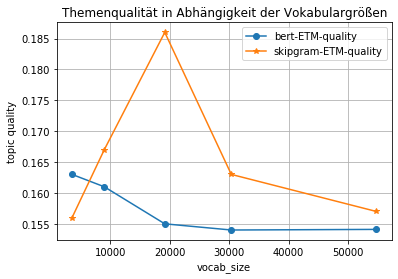

In [11]:
bert =[
    (2, 0.169 ,0.914 ,0.1541 ,0.333),
    (5 ,0.176 ,0.874 ,0.154 ,0.461),
    (10 ,0.182 ,0.852 ,0.155 ,0.709),
    (30 ,0.190 ,0.846 ,0.161, 0.79),
    (100 ,0.195, 0.83 ,0.163, 1.08)]

print(bert)
bert_qlt = [0.163, 0.161, 0.155, 0.154, 0.1541]
etm_qlt =  [0.156, 0.167, 0.186, 0.163, 0.157]
xs = vocab_size_with_out_stopwords

markers_on = vocab_size_with_out_stopwords
plt.plot(xs, bert_qlt, marker='o', label="bert-ETM-quality")
plt.plot(xs, etm_qlt, marker='*', label="skipgram-ETM-quality")

plt.legend()
plt.grid()
plt.title('Themenqualität in Abhängigkeit der Vokabulargrößen')
plt.xlabel('vocab_size')
plt.ylabel('topic quality')
plt.savefig(f'{figures_directory_pth}/etm_bert_topic_quality.png')
plt.show()


In [12]:
def get_ratio(list_1, list_2):
    ratios = []
    for i in range(0,len(list_1)):
        ratios.append(list_1[i]/list_2[i])
    return ratios

# Ratio zwischen Coherence und PPL

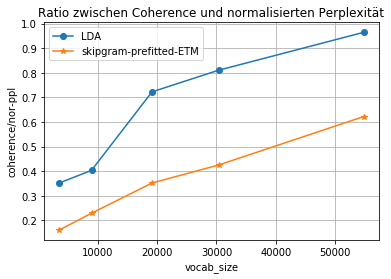

In [13]:
xs = vocab_size_with_out_stopwords
lda_ratios = get_ratio(ldas_values[0], ldas_values[3])#np.array(ldas_values[0])/np.array(ldas_values[3])
etm_ratios = get_ratio(etms_values[0], etms_values[3]) #np.array(etms_values[0])/np.array(etms_values[3])

markers_on = vocab_size_with_out_stopwords
plt.plot(xs, lda_ratios, marker='o', label="LDA")
plt.plot(xs, etm_ratios, marker='*', label="skipgram-prefitted-ETM")

plt.legend()
plt.grid()
plt.title('Ratio zwischen Coherence und normalisierten Perplexität')
plt.xlabel('vocab_size')
plt.ylabel('coherence/nor-ppl')
plt.savefig(f'{figures_directory_pth}/coh_ppl.png')
plt.show()

# LDA mit Stoppwörter

In [14]:
lda_sw = [(0.1641693325913551, 0.67   ,  0.10999345283620793, 0.056), 
          (0.15141497155997818, 0.6   ,  0.09084898293598691, 0.088) ,
          (0.17819827044514905    ,  0.518  ,  0.09230670409058721, 0.119 ),
          (0.16438967057782242  ,  0.558  ,  0.09172943618242492, 0.186),
          (0.13943853423532304  ,  0.522  ,  0.07278691487083863, 0.292)
         ] 
lda_sw

lda_sw_values = []
l1 = [e[0]for e in lda_sw]
l2 = [e[1]for e in lda_sw]
l3 = [e[2]for e in lda_sw]
l4 = [e[3]for e in lda_sw]

lda_sw_values=[l1,l2,l3, l4]
for values_by_vocab_sizes in lda_sw_values:
    print(sum(values_by_vocab_sizes)/len(values_by_vocab_sizes))
    mn, std = get_mean_std(values_by_vocab_sizes)
    print(mn, std)

0.15952215588192556
0.15952215588192556 0.01313898399371881
0.5736000000000001
0.5736000000000001 0.05654591055063134
0.09153309818320912
0.09153309818320912 0.011775475456021645
0.1482
0.1482 0.08376729672133391


In [15]:
etm_sw = [
    (2 , 54801  , 0.17517037409331376  , 0.8   , 0.14013629927465102, 0.094),
    (5 , 30355  , 0.1688368530114979   ,  0.812   , 0.1370955246453363, 0.151),
    (10 , 19148 , 0.16664989189162896    , 0.83   , 0.13831941027005204, 0.205),
    (30 , 8956  , 0.15153757911148671  , 0.86   , 0.13032231803587857, 0.314),
    (100, 3524  , 0.1653874930928496  ,  0.868  , 0.14355634400459347, 0.460)]  
etm_sw_values = []
l1 = [e[2]for e in etm_sw]
l2 = [e[3]for e in etm_sw]
l3 = [e[4]for e in etm_sw]
l4 = [e[5]for e in etm_sw]
etm_sw_values=[l1,l2,l3, l4]

for values_by_vocab_sizes in etm_sw_values:
    mn, std = get_mean_std(values_by_vocab_sizes)
    print(mn, std)

0.16551643824015538 0.007758008485183066
0.834 0.02641211843075066
0.1378859792461023 0.0043643700245662815
0.2448 0.1297865940688791


# ETM
\hline
2 & 54318  & 0.1912626359290752  & 0.822   & 0.1572178867336998   &  \\
5 & 29874  & 0.1894663393067938  & 0.864   &  0.16369891716106985  & \\
10 & 18677 & 0.21448258799152922   &  0.868  & 0.18617088637664736  & \\
30 & 8496  & 0.19353942927954834  &  0.868  &  0.16799222461464797 & \\
100& 3102  & 0.17383255850088972  & 0.898   &  0.15610163753379896 & \\\hline
mean& - & 0.19 & 0.86 &  0.17 &\\ 
%std& -& 0.01 & 0.03 & 0.01
\end{tabular}




"""
%train with prefitted-skipgram min_df: 2 	 vocab-size 54318 	 epochs: 150 	 run time: 4:08:24.473258
%train with prefitted-skipgram min_df: 5 	 vocab-size 29874 	 epochs: 150 	 run time: 2:10:44.357142
%train with prefitted-skipgram min_df: 10 	 vocab-size 18677 	 epochs: 150 	 run time: 1:25:54.377795
%train with prefitted-skipgram min_df: 30 	 vocab-size 8496 	 epochs: 150 	 run time: 0:44:30.684806
%train with prefitted-skipgram min_df: 100 	 vocab-size 3102 	 epochs: 150 	 run time: 0:21:30.842604
%train with prefitted-bert min_df: 30 	 vocab-size 8473 	 epochs: 160 	 run time: 0:48:15.063471
%train with prefitted-bert min_df: 100 	 vocab-size 3095 	 epochs: 160 	 run time: 0:24:11.248944
%Arbeitsspeichergebrauch LDA Gensim 1,6GB ; Skipgram-ETM 3.5GB-4.5GB ;Bert-ETM 3.5GB-4.5GB(die über 4GB bei min_2df)
%3.3GB 10df ,3,8GB 5df, 4,2GB 2df, 2GB 30 df, 1,5GB 100 df
% Provide information on computational requirements for each of your experiments. For example, the number of CPU/GPU hours and memory requirements.
% Mention both your estimation made before running the experiments (i.e. in the proposal) and the actual resources you used to reproducing the experiments. 
% \textbf{\textit{You'll need to think about this ahead of time, and write your code in a way that captures this information so you can later add it to this section.} }
"""

# Bert- Ohne Stopwörter

\begin{table}[h]
\centering
\begin{tabular}{ccllll}
\textbf{min df} & \textbf{vocab\_size} & \textbf{coherrence} & \textbf{diversity} & \textbf{quality} & \textbf{perplexity} \\ \hline
2 & & & & & \\
5 & & 0.176 & 0.874 & 0.154 & 0.461\\ 
10 &  & 0.1825276709667826    & 0.852   & 0.15551357566369878 & 0.7099108013289301  \\
30 &   & 0.19091152429970376  & 0.846   &  0.1615111495575494  & \\
30& & 0.17895795974840978 & 0.842&0.15068260210816103&0.9666825397604264\\
100&   & 0.18743985290752097  & 0.808   &  0.15145140114927694  & \\
100&   & 0.19142758968214188  & 0.8   &  0.1531420717457135  & 1.217239367267149 \\\hline
mean& - & 0.19 & 0.83 &0.1545&2.09  \\ 
std& -&  &  & 
\end{tabular}
\caption{Ergebnisse von Bert-ETM Modell im Fall, dass Stoppwörter entfernt wurden}
\label{tab:result-lda}
\end{table}